<a href="https://colab.research.google.com/github/ayush87919/EvoDist/blob/main/Evodist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('codon_usage.csv')

## Convert codon frequencies to numeric
X = dataset.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)  # Replace NaNs

<ipython-input-16-11591ce79316>:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('codon_usage.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(dataset['SpeciesName'])

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators=300,   # Number of trees
    max_depth=20,       # Limits overfitting
    min_samples_split=5, # Prevents overfitting
    random_state=0,
    n_jobs=-1           # Uses all CPU cores
)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300,
                      n_jobs=-1, random_state=0)

## Predicting the Test set results

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

## Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 2137.5428598310336
R² Score: 0.6818343183387037


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6818343183387037


Top 10 Important Features:
   Feature  Importance
63     UGA    0.513851
0      UUU    0.054767
53     CGA    0.024666
58     GAC    0.021038
57     GAU    0.016786
42     CAG    0.013099
6      CUA    0.011031
1      UUC    0.009786
50     AAG    0.009371
51     CGU    0.009001


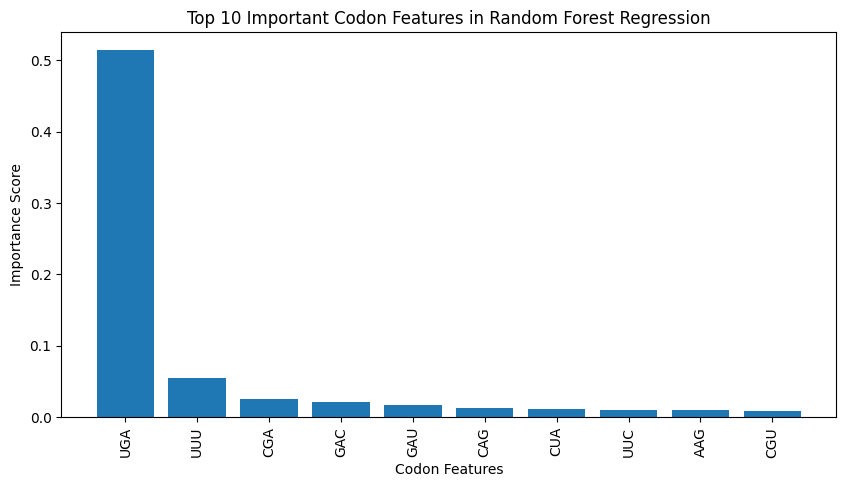

In [ ]:
feature_importances = regressor.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(important_features.head(10))

## Plot Important Features
plt.figure(figsize=(10, 5))
plt.bar(important_features['Feature'][:10], important_features['Importance'][:10])
plt.xticks(rotation=90)
plt.xlabel("Codon Features")
plt.ylabel("Importance Score")
plt.title("Top 10 Important Codon Features in Random Forest Regression")
plt.show()